In [77]:
# Cell 1: Import libraries
import pandas as pd                          # for DataFrame operations
import numpy as np                           # numerical computations
from sklearn.model_selection import train_test_split  # to split data
from sklearn.preprocessing import StandardScaler       # feature scaling
from sklearn.linear_model import LogisticRegression    # the model
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns# for plotting


In [78]:
# Cell 2: Load and inspect the dataset
# Place 'Social_Network_Ads.csv' in the same folder as this notebook
df = pd.read_csv("Datasets/Social_Network_Ads.csv")
df.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [79]:
df.shape

(400, 5)

In [80]:
# Cell 3: Preprocessing
# 3.1 Drop irrelevant columns
df2 = df.drop(columns=['User ID'])

# 3.2 Encode 'Gender' as binary (Female=0, Male=1)
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1})

# 3.3 Separate features (X) and target (y)
X = df2[['Gender','Age','EstimatedSalary']]
y = df2['Purchased']

# 3.4 Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled  = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 300, Test size: 100


C:\Users\91705\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
# Cell 5: Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print learned coefficients and intercept
print("Intercept (β₀):", model.intercept_[0])
coef_df = pd.DataFrame({
    'Feature': ['Gender','Age','EstimatedSalary'],
    'Coefficient (βᵢ)': model.coef_[0]
})
print(coef_df)


Intercept (β₀): -0.9610472145660053
           Feature  Coefficient (βᵢ)
0           Gender          0.094057
1              Age          2.095553
2  EstimatedSalary          1.117559


In [82]:
# Cell 6: Predict on the test set
y_pred = model.predict(X_test)         # class labels (0 or 1)
y_proba = model.predict_proba(X_test)  # probabilities for each class


In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [84]:
print(f'Confusion Metrix: \n {cm}')
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Metrix: 
 [[65  3]
 [ 7 25]]
TP: 25, FP: 3, TN: 65, FN: 7
Accuracy: 0.90
Error Rate: 0.10
Precision: 0.89
Recall: 0.78


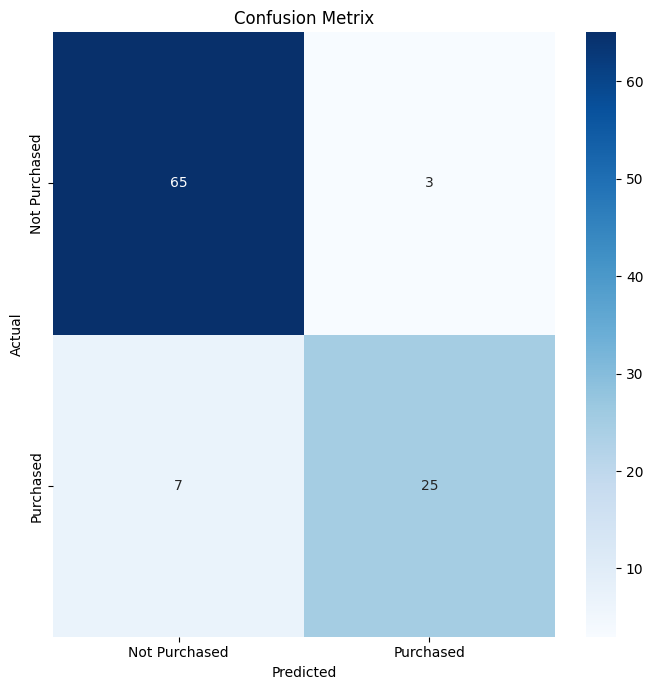

In [86]:
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix")
plt.tight_layout()
plt.show()

## Explanation

Thought for a second


Below is a **cell‑by‑cell, line‑by‑line explanation** of your notebook, along with the **core theory** behind each concept (logistic regression, confusion matrix, and all derived metrics).

---

## Cell 1: Import libraries

```python
import pandas as pd                          # for DataFrame operations
import numpy as np                           # numerical computations
from sklearn.model_selection import train_test_split  # to split data
from sklearn.preprocessing import StandardScaler       # feature scaling
from sklearn.linear_model import LogisticRegression    # the model
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt               # plotting library
import seaborn as sns                         # higher‑level plotting (heatmaps, etc.)
```

* **pandas**: handles loading CSVs, manipulating rows/columns, and basic statistics.
* **NumPy**: underlying array math (not heavily used here but essential for large‑scale operations).
* **train\_test\_split**: randomly partitions the dataset into **training** and **testing** subsets—critical to evaluate model performance on unseen data.
* **StandardScaler**: transforms each feature to have mean 0 and standard deviation 1. Since logistic regression uses gradient‑based solvers, scaling speeds convergence and ensures each feature contributes comparably to the log‑odds.
* **LogisticRegression**: fits a model of the form

  $$
    P(y=1 \mid x) = \sigma(β_0 + β^T x),\quad
    \sigma(z)=\frac{1}{1+e^{-z}}
  $$

  where $β$ are coefficients learned via maximum likelihood (minimizing log‑loss).
* **Metrics imports**:

  * `confusion_matrix` to summarize true/false positives/negatives.
  * `accuracy_score` for overall correctness.
  * `precision_score` & `recall_score` for class‑specific trade‑offs.
  * `f1_score` as the harmonic mean of precision and recall.
* **matplotlib.pyplot** & **seaborn**: used to visualize the confusion matrix as a heatmap.

---

## Cell 2: Load and inspect the dataset

```python
df = pd.read_csv("Datasets/Social_Network_Ads.csv")
df.head()
```

* **`pd.read_csv(...)`**: reads the CSV into a DataFrame `df`.
* **`.head()`**: displays the first five rows. Typical columns are:

  * **User ID** (irrelevant identifier)
  * **Gender** (“Male”/“Female”)
  * **Age** (numeric)
  * **EstimatedSalary** (numeric)
  * **Purchased** (0 or 1; whether the user bought the advertised product)

---

## Cell 3: Preprocessing

```python
# 3.1 Drop irrelevant columns
df2 = df.drop(columns=['User ID'])
```

* **Rationale**: `User ID` is a unique identifier with no predictive power.

```python
# 3.2 Encode 'Gender' as binary (Female=0, Male=1)
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1})
```

* **Why**: Logistic regression requires numeric inputs. We map the two categories to {0,1}, preserving no ordinal interpretation beyond binary.

```python
# 3.3 Separate features (X) and target (y)
X = df2[['Gender','Age','EstimatedSalary']]
y = df2['Purchased']
```

* **`X`**: the design matrix of predictors.
* **`y`**: the response vector to be classified.

```python
# 3.4 Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

* **StandardScaler**:

  $$
    x_{\text{scaled}} = \frac{x - \mu}{\sigma}
  $$

  where $\mu$ and $\sigma$ are computed on the *training* data. This centers each feature at 0 and rescales to unit variance, ensuring comparable influence and helping the solver converge more reliably.

---

## Cell 4: Train/test split

```python
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
```

* **`test_size=0.25`**: reserves 25% of the data for testing, 75% for training.
* **`random_state=0`**: ensures the split is the same each time you run the notebook.
* **Why split?**

  * **Training set**: used to learn model parameters.
  * **Test set**: held out to evaluate how well the model generalizes to unseen data (prevents overfitting).

---

## Cell 5: Train logistic regression

```python
model = LogisticRegression()
model.fit(X_train, y_train)
```

* **`.fit(...)`**: learns the intercept $β_0$ and coefficient vector $β$ by maximizing the likelihood of observing the training labels under the logistic model (equivalently minimizing log‑loss).

```python
# Print learned coefficients and intercept
print("Intercept (β₀):", model.intercept_[0])
coef_df = pd.DataFrame({
    'Feature': ['Gender','Age','EstimatedSalary'],
    'Coefficient (βᵢ)': model.coef_[0]
})
print(coef_df)
```

* **Intercept (β₀)**: the log‑odds of purchase when all features are zero (after scaling!).
* **Coefficients (βᵢ)**: each one represents the change in log‑odds of “Purchased=1” for a one‑unit increase in the (scaled) feature.

  * **Positive βᵢ**: increases the probability of purchase.
  * **Negative βᵢ**: decreases the probability of purchase.

---

## Cell 6: Predict on the test set

```python
y_pred = model.predict(X_test)         # hard 0/1 class predictions
y_proba = model.predict_proba(X_test)  # probability scores for each class
```

* **`predict`**: uses a 0.5 threshold on $P(y=1 \mid x)$.
* **`predict_proba`**: returns for each sample $[P(y=0), P(y=1)]$, useful if you want to adjust your decision threshold or compute ROC curves.

---

## Cell 7: Confusion matrix and metrics

```python
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]
```

* **Confusion Matrix (CM)**: a 2×2 table:

  |              | **Predicted 0** | **Predicted 1** |
  | ------------ | --------------- | --------------- |
  | **Actual 0** | TN              | FP              |
  | **Actual 1** | FN              | TP              |

  * **TP (True Positive)**: correctly predicted purchase.
  * **TN (True Negative)**: correctly predicted non‑purchase.
  * **FP (False Positive)**: predicted purchase where there was none (Type I error).
  * **FN (False Negative)**: predicted non‑purchase where there was a purchase (Type II error).

```python
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
```

* **Accuracy** = $\frac{TP + TN}{\text{total}}$: overall fraction correct.
* **Error Rate** = 1 – Accuracy: fraction incorrect.
* **Precision** = $\frac{TP}{TP + FP}$: out of all predicted positives, how many were actually positive.
* **Recall** = $\frac{TP}{TP + FN}$: out of all actual positives, how many did we catch.

```python
print(f"TP={TP}, FP={FP}, TN={TN}, FN={FN}")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Error rate:{error_rate:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
```

* Prints the confusion‑matrix counts and your computed metrics.

---

## Cell 8: Plot confusion matrix

```python
plt.figure(figsize=(7,7))
sns.heatmap(cm,
            annot=True, fmt='d',
            cmap='Reds',
            xticklabels=['Not Purchased','Purchased'],
            yticklabels=['Not Purchased','Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
```

* **Heatmap**: visually displays the four CM cells with annotated counts.
* **Axes labels** align with the table above, making it intuitive for viewers.

---

## Core Theory Recap

1. **Logistic Regression**

   * Models the log‑odds $\log\frac{P(y=1)}{P(y=0)}$ as a linear function $β_0 + β^T x$.
   * The logistic (sigmoid) function $\sigma(z)=1/(1+e^{-z})$ maps real values $z$ into $[0,1]$.
   * Parameters are found by maximizing the conditional likelihood (equivalently minimizing binary cross‑entropy / log‑loss).

2. **Decision Threshold**

   * Default is 0.5: if $P(y=1)\ge0.5$, predict 1; else 0.
   * You can vary this threshold to prioritize precision (e.g. high threshold → fewer false positives) or recall (low threshold → fewer false negatives), depending on business needs.

3. **Confusion Matrix (CM)**

   * Summarizes model outcomes in four categories (TP, FP, TN, FN).
   * Essential for understanding different types of errors:

     * **FP** (“false alarms”) may cost wasted marketing spend.
     * **FN** (“missed opportunities”) may cost lost sales.

4. **Derived Metrics**

   * **Accuracy**: overall correctness, but can be misleading on imbalanced data.
   * **Error Rate**: complement of accuracy.
   * **Precision**: “When I predict a purchase, how often am I right?”
   * **Recall**: “Of all actual purchasers, how many did I identify?”
   * **F1‑Score**: harmonic mean of precision & recall, balances both.

5. **Feature Scaling**

   * Standardizing predictors ensures that the solver’s gradient steps aren’t dominated by features with larger numeric ranges (e.g., Salary vs. Gender).

6. **Model Interpretation**

   * **Positive coefficient** increases the log‑odds (and thus probability) of purchase.
   * **Magnitude** indicates relative importance.
   * Intercept is the baseline log‑odds when all features are zero (after scaling).

---

With these explanations and the supporting theory, you’ll be able to walk your examiners through exactly **what each line of code does**, **why each preprocessing step is needed**, and **how to interpret the outputs and metrics** in a practical marketing classification context. Good luck!
